# 🏦 Credit Scoring Classification Project

## 📚 Table of Contents

### 1️⃣ Data Preparation & Exploration
- [1.1 📥 Import Libraries & Load Data](#import-libraries)
- [1.2 📊 Initial Data Exploration](#initial-exploration)

### 2️⃣ Data Cleaning & Preprocessing
- [2.1 🧹 Clean Missing Values](#clean-missing)
- [2.2 🔄 Format Conversions](#format-conversion)
- [2.3 📏 Handle Outliers](#handle-outliers)
- [2.4 ⚖️ Data Scaling](#data-scaling)

### 3️⃣ Feature Engineering
- [3.1 🛠️ Create New Features](#create-features)
- [3.2 📊 Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
- [3.3 🔍 Scaling & Encoding](#scaling-encoding)

### 4️⃣ Model Development
- [4.1 🔄 Data Split & SMOTE](#data-split)
- [4.2 🤖 Model Training](#model-training)
- [4.3 📊 Model Evaluation](#model-evaluation)

### 5️⃣ Conclusions
- [5.1 💡 Key Insights](#key-insights)
- [5.2 📊 Model Explainability using SHAP](#SHAP)

In [49]:
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

<a id="import-libraries"></a>
## 1.1 📥 Import Libraries & Load Data


In [50]:
train = pd.read_csv('dataset/archive/train.csv')
test = pd.read_csv('dataset/archive/test.csv')
df = pd.concat([train, test], ignore_index=True)
pd.set_option('display.max_columns', None)
df.sample(5)

/tmp/ipykernel_13286/1390856845.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('dataset/archive/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
96457,0x24b2f,CUS_0x2f8c,February,Lynchw,53,#F%$D@*&8,Architect,30918.82,2780.568333,0,5,12,0,NaN,22,6,1.61,1.0,Good,1478.94,33.166860,30 Years and 9 Months,No,0.000000,78.09267098986845,High_spent_Medium_value_payments,449.96416234346486,Poor
100003,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634,NaN
6102,0x39c0,CUS_0xc02f,July,Lisac,22_,603-89-2856,Teacher,124033.96,10500.163333,0,4,12,4,"Credit-Builder Loan, Student Loan, Home Equity...",8,NaN,10.9,1.0,Good,574.88,37.809149,19 Years and 4 Months,No,264.306822,179.12717833895763,!@9#%8,846.5823326861583,Standard
1312,0x1db2,CUS_0x4bb4,January,NaN,33,742-40-7361,Media_Manager,9444.795_,850.066250,7,8,28,6,"Mortgage Loan, Credit-Builder Loan, Student Lo...",21,11,17.57,7.0,Standard,1701.58,38.488311,5 Years and 4 Months,Yes,27.594950,92.59222788607364,!@9#%8,254.8194468166045,Standard
50895,0x14035,CUS_0x10e2,August,Sonalio,37,168-78-3262,Media_Manager,43133.85000000001,3432.487500,10,10,31,7,"Personal Loan, Auto Loan, Not Specified, Home ...",43,24,6.41,11.0,Bad,2504.1,27.115861,10 Years and 9 Months,Yes,151.287255,67.89250966068741,High_spent_Large_value_payments,364.0689853638198,Standard


<a id="initial-exploration"></a>
## 1.2 📊 Initial Data Exploration

In [51]:
# renaming columns
df.rename(columns={'Monthly_Inhand_Salary': 'Monthly_Inhand_Salary',
                   'Total_EMI_per_month': 'Monthly_EMI'}, inplace=True)
                
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Monthly_EMI', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [52]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.strip().str.strip('_')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

In [53]:
# drop unnecessary columns
df.drop(columns=['ID','Num_Credit_Inquiries','Credit_Mix'], inplace=True)

# Checking the distribution of 'Payment_of_Min_Amount'
print('-' * 50)
print(df['Payment_of_Min_Amount'].value_counts())

# Checking the distribution of 'Credit_History_Age'\
print('-' * 50)
print(df['Credit_History_Age'].value_counts().head(5))

# Checking the avg of monthly inhand salary
print('-' * 50)
print("avg monthly salary: ", df['Monthly_Inhand_Salary'].mean())

# avg of 'Outstanding_Debt'
print('-' * 50)
print("avg outstanding debt: ", df['Outstanding_Debt'].mean())

# the distribution of 'Type_of_Loan'
print('-' * 50)
print(df['Type_of_Loan'].value_counts().head(5))

# the avg of 'Monthly_EMI'
print('-' * 50)
print(df['Monthly_EMI'].mean())


--------------------------------------------------
Payment_of_Min_Amount
Yes    78484
No     53516
NM     18000
Name: count, dtype: int64
--------------------------------------------------
Credit_History_Age
17 Years and 11 Months    628
18 Years and 4 Months     621
18 Years and 3 Months     617
19 Years and 9 Months     615
18 Years and 2 Months     615
Name: count, dtype: int64
--------------------------------------------------
avg monthly salary:  4190.115139286901
--------------------------------------------------
avg outstanding debt:  1426.220376
--------------------------------------------------
Type_of_Loan
Not Specified              2112
Credit-Builder Loan        1920
Personal Loan              1908
Debt Consolidation Loan    1896
Student Loan               1860
Name: count, dtype: int64
--------------------------------------------------
1432.513579465278


In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  object 
 2   Name                      135000 non-null  object 
 3   Age                       150000 non-null  object 
 4   SSN                       150000 non-null  object 
 5   Occupation                150000 non-null  object 
 6   Annual_Income             150000 non-null  object 
 7   Monthly_Inhand_Salary     127500 non-null  float64
 8   Num_Bank_Accounts         150000 non-null  int64  
 9   Num_Credit_Card           150000 non-null  int64  
 10  Interest_Rate             150000 non-null  int64  
 11  Num_of_Loan               150000 non-null  object 
 12  Type_of_Loan              132888 non-null  object 
 13  Delay_from_due_date       150000 non-null  i

<a id="clean-missing"></a>
## 2.1 🧹 Clean Missing Values

In [55]:
# check the missing values
df.isnull().sum()

Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Monthly_EMI                     0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [56]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [57]:
# the prediction could be biased since the standard has 53174 samples, poor has 28998 samples, and good has 17828 samples so we will use SMOTE to balance the dataset later

In [58]:
df

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Monthly_EMI,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,3571.70,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,NaN
149996,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",20,NaN,11.5,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,NaN
149997,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098,NaN
149998,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",21,6_,11.5,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,NaN


In [59]:
# fill missing values
from sklearn.impute import KNNImputer

# 1. Fill missing categorical values
df['Name'] = df['Name'].fillna('Unknown')
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Unknown')
df['Credit_History_Age'] = df['Credit_History_Age'].fillna('Unknown')

# 2. Clean and convert numerical columns
numerical_cols = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
                  'Amount_invested_monthly', 'Monthly_Balance']

for col in numerical_cols:
    df['col'] = df[col].astype(str) 
    df[col] = df[col].replace(r'[^0-9.-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # coerce used to convert non-numeric values to NaN

# 3. Apply KNN imputer (after cleaning, without pre-filling with 0)
imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


df.isnull().sum()

Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Monthly_EMI                     0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
col                             0
dtype: int64

In [60]:
# 4. Clean and convert Annual_Income
df['Annual_Income'] = df['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce').fillna(0)

# 5. Clean Age and Num_of_Loan
df['Age'] = df['Age'].fillna('0').str.extract(r'(\d+)').astype(float).fillna(0).astype(int)
df['Num_of_Loan'] = df['Num_of_Loan'].fillna('0').str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

# 6. Clean Outstanding_Debt
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str).str.replace(r'[^0-9.]', '', regex=True) # regex will remove all non-numeric characters
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce').fillna(0)

<a id="format-conversion"></a>
## 2.2 🔄 Format Conversions

In [61]:
# 7. Convert Credit_History_Age to total months
def parse_years_and_months(age: str) -> int:
    """Convert 'X Years and Y Months' to total months"""
    if isinstance(age, str):
        try:
            years = int(age.split(' Years')[0]) if 'Years' in age else 0
            months = int(age.split('and')[-1].split(' Months')[0].strip()) if 'Months' in age else 0
            return years * 12 + months
        except Exception:
            return 0
    return 0

df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months)


In [62]:
# 8. Clip unrealistic values
df['Age'] = df['Age'].clip(lower=14, upper=100)
df['Monthly_Balance'] = df['Monthly_Balance'].clip(lower=-1e5, upper=1e5)

# 9. Clip known-positive columns to eliminate negatives
positive_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 
                 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                 'Monthly_EMI', 'Amount_invested_monthly']

# Removing rediculous top outliers (2%)
selected_columns_train = df[positive_cols]
percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)
for column in selected_columns_train.columns:
    df = df[df[column] <= percentiles[column]]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136773 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_ID                136773 non-null  object 
 1   Month                      136773 non-null  object 
 2   Name                       136773 non-null  object 
 3   Age                        136773 non-null  int64  
 4   SSN                        136773 non-null  object 
 5   Occupation                 136773 non-null  object 
 6   Annual_Income              136773 non-null  float64
 7   Monthly_Inhand_Salary      136773 non-null  float64
 8   Num_Bank_Accounts          136773 non-null  int64  
 9   Num_Credit_Card            136773 non-null  int64  
 10  Interest_Rate              136773 non-null  int64  
 11  Num_of_Loan                136773 non-null  int64  
 12  Type_of_Loan               136773 non-null  object 
 13  Delay_from_due_date        136773 

<a id="handle-outliers"></a>
## 2.3 📏 Handle Outliers

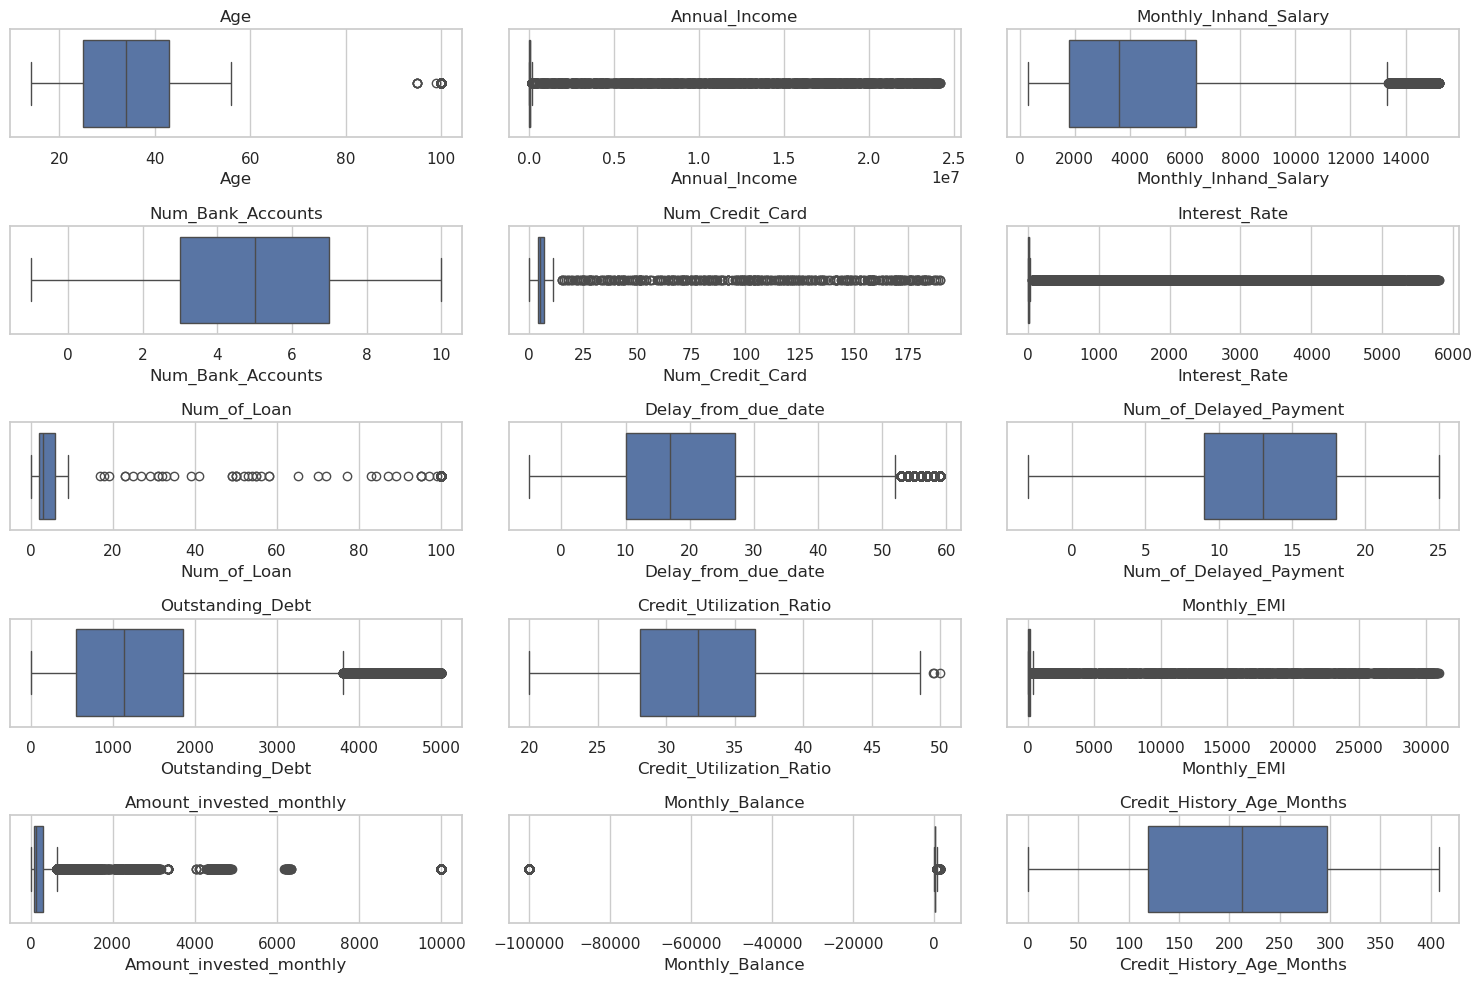

In [64]:
# show the boxplot for all the numerical columns in the dataset using subplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()  

In [65]:
df['Age'] = df['Age'].apply(lambda x: 80 if x >= 80 else x)

df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].clip(upper=10)

# Winsorize top 2% (cap at $4500) for outstanding debt (means to make sure no one has more than $4500 in outstanding debt, otherwise then make it $4500)
df['Outstanding_Debt'] = df['Outstanding_Debt'].clip(upper=4500)

df['Amount_invested_monthly'] = np.log1p(df['Amount_invested_monthly'])
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].clip(upper=df['Amount_invested_monthly'].quantile(0.99))

df['Num_Credit_Card'] = np.sqrt(df['Num_Credit_Card'])

df['Delay_from_due_date'] = df['Delay_from_due_date'].clip(upper=90)
df['Delay_Flag'] = np.where(df['Delay_from_due_date'] > 0, 1, 0)

df['Monthly_Balance'] = df['Monthly_Balance'].clip(lower=0)

df['Monthly_EMI'] = df['Monthly_EMI'].clip(upper=550)

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,136773.0,34.856441,1.308831e+01,14.000000,25.000000,34.000000,43.000000,8.000000e+01
Annual_Income,136773.0,174030.034989,1.408395e+06,7005.930000,19594.290000,37813.290000,73436.070000,2.419806e+07
Monthly_Inhand_Salary,136773.0,4500.563664,3.140718e+03,303.645417,1790.959167,3607.545000,6415.450000,1.520463e+04
Num_Bank_Accounts,136773.0,5.302136,2.583471e+00,-1.000000,3.000000,5.000000,7.000000,1.000000e+01
Num_Credit_Card,136773.0,2.320324,6.386638e-01,0.000000,2.000000,2.236068,2.645751,1.378405e+01
Interest_Rate,136773.0,71.218406,4.626752e+02,1.000000,7.000000,13.000000,20.000000,5.799000e+03
Num_of_Loan,136773.0,7.274703,1.892113e+01,0.000000,2.000000,3.000000,6.000000,1.000000e+02
Delay_from_due_date,136773.0,20.201743,1.386506e+01,-5.000000,10.000000,17.000000,27.000000,5.900000e+01
Num_of_Delayed_Payment,136773.0,13.132411,6.049459e+00,-3.000000,9.000000,13.000000,18.000000,2.500000e+01
Outstanding_Debt,136773.0,1384.704378,1.116208e+03,0.230000,555.440000,1137.020000,1855.460000,4.500000e+03


In [67]:
# Removing rediculous top outliers (2%)

selected_columns_train = df[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Monthly_EMI', 'Num_Credit_Card']]

percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

for column in selected_columns_train.columns:
    df = df[df[column] <= percentiles[column]]

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,128774.0,34.906689,13.096504,14.000000,25.000000,34.000000,43.000000,80.000000
Annual_Income,128774.0,49921.017841,36800.658980,7005.930000,19519.660000,36943.760000,71608.120000,167067.080000
Monthly_Inhand_Salary,128774.0,4431.273863,3023.753718,303.645417,1789.873333,3564.533333,6373.601667,14131.123333
Num_Bank_Accounts,128774.0,5.283590,2.571033,-1.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,128774.0,2.292255,0.456462,0.000000,2.000000,2.236068,2.645751,3.162278
Interest_Rate,128774.0,14.180137,8.594432,1.000000,7.000000,12.000000,20.000000,88.000000
Num_of_Loan,128774.0,7.255913,18.956868,0.000000,2.000000,3.000000,5.000000,100.000000
Delay_from_due_date,128774.0,20.032584,13.713148,-5.000000,10.000000,17.000000,27.000000,59.000000
Num_of_Delayed_Payment,128774.0,13.003154,5.882832,-3.000000,9.000000,13.000000,18.000000,24.000000
Outstanding_Debt,128774.0,1366.721548,1103.049146,0.230000,551.660000,1125.350000,1808.120000,4500.000000


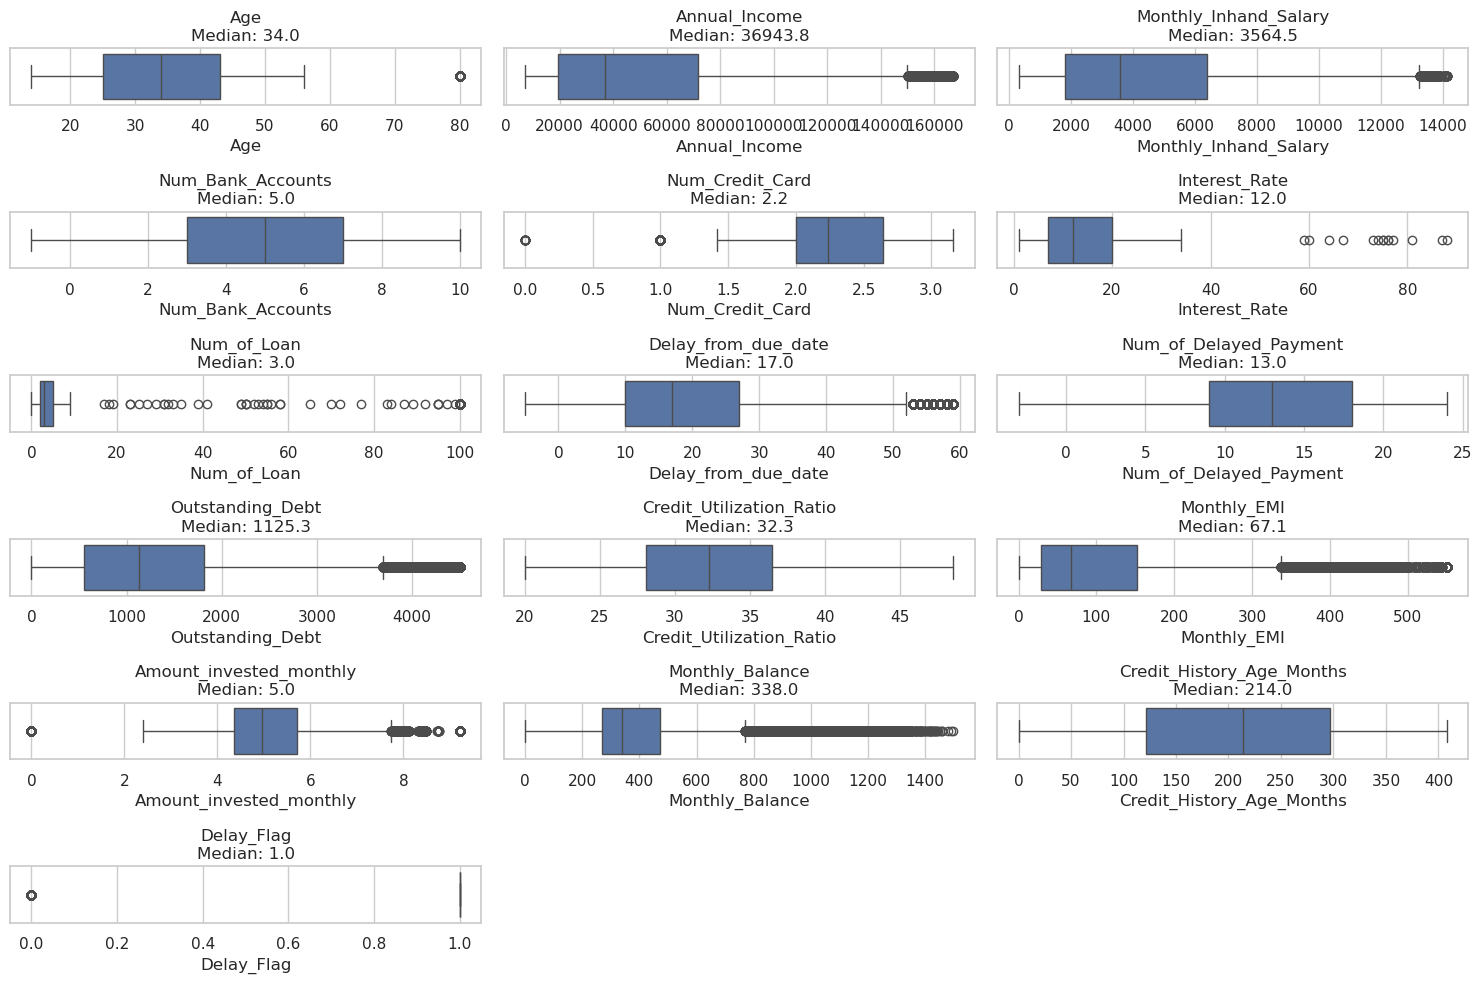

In [69]:
# Count numerical columns
num_cols = len(df.select_dtypes(include=['float64', 'int64']).columns)
rows = (num_cols // 3) + (1 if num_cols % 3 else 0)  # Dynamic row calculation

plt.figure(figsize=(15, 10))  # Scale height based on rows
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f"{column}\nMedian: {df[column].median():.1f}")  # Add median for reference
plt.tight_layout()
plt.show()

<a id="create-features"></a>
## 3.1 🛠️ Create New Features

In [70]:
# drop col column
df.drop(columns=['col'], inplace=True)

credit_score = df.pop('Credit_Score')
df['Credit_Score'] = credit_score

In [71]:
# how many times Aaron Maashoh appears in the dataset
aaron_count = df[df['Name'].str.contains('Aaron Maashoh', case=False, na=False)].shape[0]
print(f"Aaron Maashoh appears {aaron_count} times in the dataset.")

Aaron Maashoh appears 11 times in the dataset.


In [72]:
df.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Monthly_EMI', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_History_Age_Months',
       'Delay_Flag', 'Credit_Score'],
      dtype='object')

In [73]:
df['Month'].value_counts()

Month
November     10795
July         10783
June         10762
April        10747
January      10739
December     10738
March        10726
May          10723
October      10722
February     10707
September    10669
August       10663
Name: count, dtype: int64

In [74]:
"""RFM (Recency, Frequency, Monetary) columns"""
# create a "Frequency" column that contains many times the Customer_ID appears in the dataset
df['Frequency'] = df['Customer_ID'].map(df['Customer_ID'].value_counts())

# encode the months as integers
df['Month'].replace({'January': 1, 'February': 2, 'March': 3, 'April': 4,
                     'May': 5, 'June': 6, 'July': 7,
                     'August': 8, 'September': 9, 'October': 10,
                     'November': 11, 'December': 12}, inplace=True)

# get the latest month the Customer_ID appears in the dataset
df['Recency'] = df.groupby('Customer_ID')['Month'].transform('max') - 9


In [75]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      32666
High_spent_Medium_value_payments    22799
Low_spent_Medium_value_payments     17748
High_spent_Large_value_payments     17673
High_spent_Small_value_payments     14663
Low_spent_Large_value_payments      13458
!@9#%8                               9767
Name: count, dtype: int64

In [76]:
df['Payment_Behaviour'].replace({'!@9#%8': 'Medium_spent_Moderate_value_payments',}, inplace=True)
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments          32666
High_spent_Medium_value_payments        22799
Low_spent_Medium_value_payments         17748
High_spent_Large_value_payments         17673
High_spent_Small_value_payments         14663
Low_spent_Large_value_payments          13458
Medium_spent_Moderate_value_payments     9767
Name: count, dtype: int64

In [77]:
df[['Credit_Utilization_Ratio','Changed_Credit_Limit', 'Outstanding_Debt']].head()

,Credit_Utilization_Ratio,Changed_Credit_Limit,Outstanding_Debt
0,26.822620,11.27,809.98
1,31.944960,11.27,809.98
2,28.609352,_,809.98
3,31.377862,6.27,809.98
4,24.797347,11.27,809.98


In [78]:
# monetary is contains the last Outstanding_Debt for each Customer_ID
df['Monetary'] = df.groupby('Customer_ID')['Outstanding_Debt'].transform('last')

In [79]:
# decode month column
df['Month'] = df['Month'].map({
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'})

df['Month'].value_counts()

Month
November     10795
July         10783
June         10762
April        10747
January      10739
December     10738
March        10726
May          10723
October      10722
February     10707
September    10669
August       10663
Name: count, dtype: int64

<a id="sexploratory-data-analysis"></a>
## 3.2 📊 Exploratory Data Analysis (EDA)

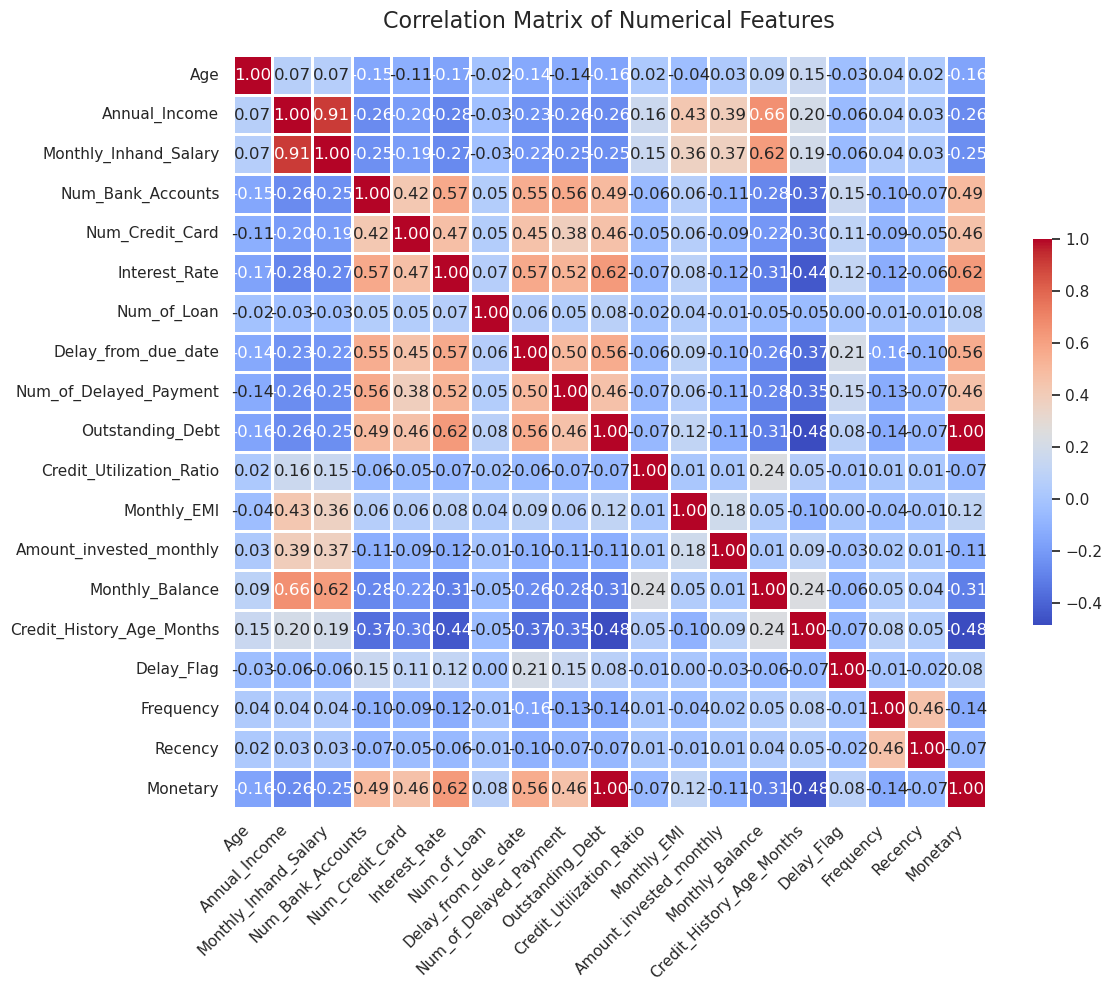


Highly correlated features (|correlation| > 0.5):
Annual_Income -> Monthly_Inhand_Salary: 0.91
Annual_Income -> Monthly_Balance: 0.66
Monthly_Inhand_Salary -> Annual_Income: 0.91
Monthly_Inhand_Salary -> Monthly_Balance: 0.62
Num_Bank_Accounts -> Interest_Rate: 0.57
Num_Bank_Accounts -> Delay_from_due_date: 0.55
Num_Bank_Accounts -> Num_of_Delayed_Payment: 0.56
Interest_Rate -> Num_Bank_Accounts: 0.57
Interest_Rate -> Delay_from_due_date: 0.57
Interest_Rate -> Num_of_Delayed_Payment: 0.52
Interest_Rate -> Outstanding_Debt: 0.62
Interest_Rate -> Monetary: 0.62
Delay_from_due_date -> Num_Bank_Accounts: 0.55
Delay_from_due_date -> Interest_Rate: 0.57
Delay_from_due_date -> Outstanding_Debt: 0.56
Delay_from_due_date -> Monetary: 0.56
Num_of_Delayed_Payment -> Num_Bank_Accounts: 0.56
Num_of_Delayed_Payment -> Interest_Rate: 0.52
Outstanding_Debt -> Interest_Rate: 0.62
Outstanding_Debt -> Delay_from_due_date: 0.56
Outstanding_Debt -> Monetary: 1.00
Monthly_Balance -> Annual_Income: 0.66
Mon

In [80]:
# Create correlation matrix for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 10))

# Create heatmap without mask (mask means to hide the upper triangle)
sns.heatmap(correlation_matrix, 
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Numerical Features', pad=20, size=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print highly correlated features (correlation > 0.5)
print("\nHighly correlated features (|correlation| > 0.5):")
high_corr = np.where(np.abs(correlation_matrix) > 0.5)
for i, j in zip(*high_corr):
    if i != j:  # Only avoid diagonal
        print(f"{correlation_matrix.index[i]} -> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

In [81]:
df['Type_of_Loan'].value_counts().head(40)

Type_of_Loan
Unknown                                             15174
Not Specified                                        1906
Personal Loan                                        1711
Credit-Builder Loan                                  1677
Student Loan                                         1674
Debt Consolidation Loan                              1667
Payday Loan                                          1607
Auto Loan                                            1523
Mortgage Loan                                        1519
Home Equity Loan                                     1508
Personal Loan, and Student Loan                       412
Mortgage Loan, and Home Equity Loan                   358
Not Specified, and Payday Loan                        346
Credit-Builder Loan, and Not Specified                339
Student Loan, and Credit-Builder Loan                 337
Student Loan, and Payday Loan                         335
Payday Loan, and Debt Consolidation Loan              329
C

In [82]:
# Student, Not Specified ='Unknown', Personal, Home Equity, Mortgage, Debt Consolidation, Credit-Builder,Auto Loan, Payday
import re

# Define mapping keywords to final categories
loan_map = {
    'student': 'Student',
    'not specified': 'Unknown',
    'unknown': 'Unknown',
    'personal': 'Personal',
    'home equity': 'Home Equity',
    'mortgage': 'Mortgage',
    'debt consolidation': 'Debt Consolidation',
    'credit-builder': 'Credit-Builder',
    'auto': 'Auto Loan',
    'payday': 'Payday'
}

def map_loan_type(value):
    value_lower = str(value).lower()
    for keyword, category in loan_map.items():
        if re.search(keyword, value_lower):
            return category
    return 'Other'  # If it doesn't match any category

# Apply mapping
df['Type_of_Loan'] = df['Type_of_Loan'].apply(map_loan_type)

# Check result
df['Type_of_Loan'].value_counts()


Type_of_Loan
Unknown               41011
Student               39055
Personal              16620
Home Equity           11266
Mortgage               7300
Debt Consolidation     5322
Credit-Builder         3779
Auto Loan              2565
Payday                 1856
Name: count, dtype: int64

/tmp/ipykernel_13286/2069592842.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['No Delay', 'Delay'])


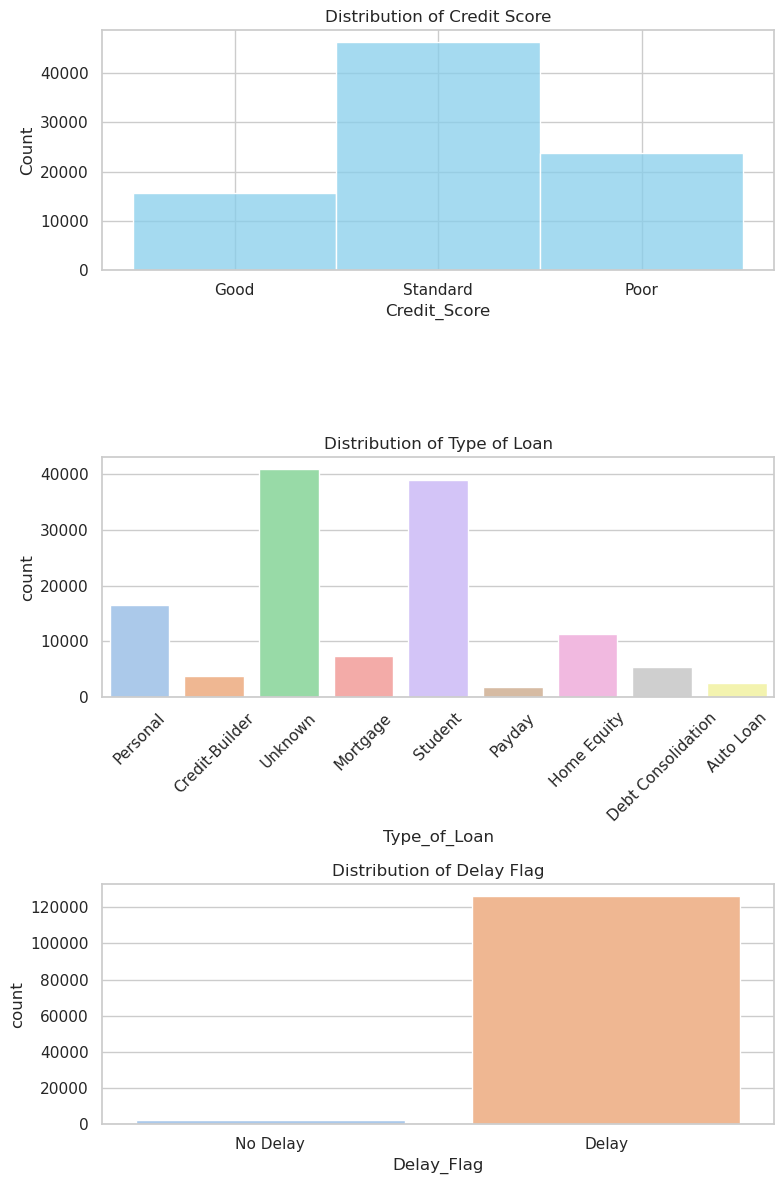

In [83]:
sns.set(style="whitegrid")

# Create subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# 1. Distribution of Credit_Score
sns.histplot(df['Credit_Score'], ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Credit Score')

# 2. Distribution of Type_of_Loan (countplot for categories)
sns.countplot(x='Type_of_Loan', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Distribution of Type of Loan')
axes[1].tick_params(axis='x', rotation=45)

# 3. count plot for Delay_Flag
sns.countplot(x='Delay_Flag', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('Distribution of Delay Flag')
axes[2].set_xticklabels(['No Delay', 'Delay'])

plt.tight_layout()
plt.show()



<a id="scaling-encoding"></a>
## 3.3 🔍 Scaling & Encoding

In [84]:
# scaling based on the EDA we done before

df = df[df['Age'] <=55]
df = df[df['Monthly_Inhand_Salary'] <= 8000]
df = df[(df['Num_Credit_Card'] >=1 ) & (df['Num_Credit_Card'] <= 3)]
df = df[df['Interest_Rate'] <=50.00]
df = df[df['Num_of_Loan'] <=12]
df = df[df['Delay_from_due_date'] <=50]
df = df[df['Outstanding_Debt'] <=3700]
df = df[df['Monthly_EMI'] <=350]
df = df[(df['Amount_invested_monthly'] >= 2) & (df['Amount_invested_monthly'] <= 7)]
df = df[df['Monthly_EMI'] <=250]


In [85]:
# get all neumerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:")
for col in numerical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Numerical columns:
Age: 42 unique values
Annual_Income: 9083 unique values
Monthly_Inhand_Salary: 17520 unique values
Num_Bank_Accounts: 12 unique values
Num_Credit_Card: 9 unique values
Interest_Rate: 34 unique values
Num_of_Loan: 10 unique values
Delay_from_due_date: 56 unique values
Num_of_Delayed_Payment: 102 unique values
Outstanding_Debt: 8905 unique values
Credit_Utilization_Ratio: 75771 unique values
Monthly_EMI: 8315 unique values
Amount_invested_monthly: 75282 unique values
Monthly_Balance: 75552 unique values
Credit_History_Age_Months: 408 unique values
Delay_Flag: 2 unique values
Frequency: 12 unique values
Recency: 12 unique values
Monetary: 8905 unique values


In [86]:
# scaling the numerical columns
from sklearn.preprocessing import StandardScaler

numerical_cols = numerical_columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [87]:
df['Total_Num_Accounts'] = df['Num_Bank_Accounts'] + df['Num_Credit_Card']
df['Debt_Per_Account'] = df['Outstanding_Debt'] / df['Total_Num_Accounts']
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']
df['Delayed_Payments_Per_Account'] = df['Num_of_Delayed_Payment'] / df['Total_Num_Accounts']

In [88]:
# show categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Categorical columns:
Customer_ID: 9091 unique values
Month: 12 unique values
Name: 7758 unique values
SSN: 9064 unique values
Occupation: 16 unique values
Type_of_Loan: 9 unique values
Changed_Credit_Limit: 3878 unique values
Credit_History_Age: 408 unique values
Payment_of_Min_Amount: 3 unique values
Payment_Behaviour: 7 unique values
Credit_Score: 3 unique values


In [91]:
df.isnull().sum()

Customer_ID                         0
Month                               0
Name                                0
Age                                 0
SSN                                 0
Occupation                          0
Annual_Income                       0
Monthly_Inhand_Salary               0
Num_Bank_Accounts                   0
Num_Credit_Card                     0
Interest_Rate                       0
Num_of_Loan                         0
Type_of_Loan                        0
Delay_from_due_date                 0
Num_of_Delayed_Payment              0
Changed_Credit_Limit                0
Outstanding_Debt                    0
Credit_Utilization_Ratio            0
Credit_History_Age                  0
Payment_of_Min_Amount               0
Monthly_EMI                         0
Amount_invested_monthly             0
Payment_Behaviour                   0
Monthly_Balance                     0
Credit_History_Age_Months           0
Delay_Flag                          0
Credit_Score

In [92]:
credit_score = df.pop('Credit_Score')
df['Credit_Score'] = credit_score
df.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Monthly_EMI', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_History_Age_Months',
       'Delay_Flag', 'Frequency', 'Recency', 'Monetary', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio',
       'Delayed_Payments_Per_Account', 'Credit_Score'],
      dtype='object')

<a id="data-split"></a>
## 4.1 🔄 Data Split & SMOTE

In [93]:
# split the df to two dfs a train and test the test contains all the records that have a credit score with null value
train = df[df['Credit_Score'].notnull()]
test = df[df['Credit_Score'].isnull()]

print(f"Train shape: {train.shape}, Test shape: {test.shape}")

Train shape: (51070, 34), Test shape: (24701, 34)


In [ ]:
categories = ['Poor', 'Standard', 'Good']
encoder = OrdinalEncoder(categories=[categories])
train['Credit_Score'] = encoder.fit_transform(train[['Credit_Score']])

# Encoding Occupation
label_encoder = LabelEncoder()
train['Occupation'] = label_encoder.fit_transform(train['Occupation'])
test['Occupation'] = label_encoder.transform(test['Occupation'])

categories_payment_behaviour = ['Low_spent_Small_value_payments',
              'High_spent_Medium_value_payments',
              'Low_spent_Medium_value_payments',
              'High_spent_Large_value_payments',
              'High_spent_Small_value_payments',
              'Low_spent_Large_value_payments',
              'Medium_spent_Moderate_value_payments']

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

train['Payment_Behaviour'] = encoder_payment_behaviour.fit_transform(train[['Payment_Behaviour']])
test['Payment_Behaviour'] = encoder_payment_behaviour.transform(test[['Payment_Behaviour']])

train['Num_of_Loan'] = label_encoder.fit_transform(train['Num_of_Loan'])
test['Num_of_Loan'] = label_encoder.transform(test['Num_of_Loan'])

train['Type_of_Loan'] = label_encoder.fit_transform(train['Type_of_Loan'])
test['Type_of_Loan'] = label_encoder.transform(test['Type_of_Loan'])

train['Payment_of_Min_Amount'] = label_encoder.fit_transform(train['Payment_of_Min_Amount'])
test['Payment_of_Min_Amount'] = label_encoder.transform(test['Payment_of_Min_Amount'])


In [97]:
train['Credit_Score'] = train['Credit_Score'].astype(int)
train['Credit_Score'].value_counts()

/tmp/ipykernel_13286/3594066758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Credit_Score'] = train['Credit_Score'].astype(int)


Credit_Score
1    29150
0    12618
2     9302
Name: count, dtype: int64

In [98]:
# 1. Select features and target
features = ['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
           'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
           'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 
           'Credit_Utilization_Ratio', 'Monthly_EMI', 'Credit_History_Age_Months', 
           'Total_Num_Accounts', 'Debt_Per_Account', 'Debt_to_Income_Ratio', 
           'Delayed_Payments_Per_Account']

# 2. Clean and convert data
X_train = train[features].copy()
y_train = train['Credit_Score']

X_test = test[features].copy()
y_test = test['Credit_Score']

# Replace any remaining non-numeric values with NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0 or median
for col in X_train.columns:
    X_train[col] = X_train[col].fillna(X_train[col].median())

for col in X_test.columns:
    X_test[col] = X_test[col].fillna(X_test[col].median())

In [100]:
# 4. Apply SMOTE on training data only
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 5. Print class distribution
print("Original class distribution:")
print(y.value_counts(normalize=True))
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nBalanced training set class distribution:")
print(y_train_balanced.value_counts(normalize=True))

# 6. Show shapes
print("\nShapes:")
print(f"Original data: {df.shape}")
print(f"Training set: {X_train.shape}")
print(f"Balanced training set: {X_train_balanced.shape}")
print(f"Test set: {X_test.shape}")

Original class distribution:
Credit_Score
1    0.570628
0    0.247543
2    0.181829
Name: proportion, dtype: float64

Training set class distribution:
Credit_Score
1    0.570785
0    0.247073
2    0.182142
Name: proportion, dtype: float64

Balanced training set class distribution:
Credit_Score
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64

Shapes:
Original data: (75771, 34)
Training set: (51070, 16)
Balanced training set: (87450, 16)
Test set: (24701, 16)


<a id="model-training"></a>
## 4.2 🤖 Model Training

In [105]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_balanced, y_train_balanced, test_size=0.1, random_state=42)

In [106]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train_split, y_train_split)

RandomForestRegressor(n_estimators=500, random_state=77)

In [107]:
y_pred = model.predict(X_test_split)
mse = mean_squared_error(y_test_split, y_pred)
accuracy = accuracy_score(y_test_split, np.round(y_pred))
print("Model Accuracy:", accuracy)
print("Mean Squared Error:", mse)

Model Accuracy: 0.8634648370497428
Mean Squared Error: 0.11048389479702689


In [108]:
xgb_model = XGBRegressor(n_estimators=3500, learning_rate=0.05, random_state=77)
xgb_model.fit(X_train_split, y_train_split)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3500, n_jobs=None,
             num_parallel_tree=None, random_state=77, ...)

In [109]:
y_pred = xgb_model.predict(X_test_split)
mse = mean_squared_error(y_test_split, y_pred)
accuracy = accuracy_score(y_test_split, np.round(y_pred))
print("Model Accuracy:", accuracy)
print("Mean Squared Error:", mse)

Model Accuracy: 0.856375071469411
Mean Squared Error: 0.12391983717679977


In [110]:
from catboost import CatBoostRegressor # install: pip install catboost
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=100)
catboost_model.fit(X_train_split, y_train_split)

0:	learn: 0.7797568	total: 48.5ms	remaining: 48.4s
100:	learn: 0.5440911	total: 306ms	remaining: 2.73s
200:	learn: 0.5149802	total: 562ms	remaining: 2.23s
300:	learn: 0.4929616	total: 792ms	remaining: 1.84s
400:	learn: 0.4735000	total: 1.17s	remaining: 1.74s
500:	learn: 0.4567948	total: 1.45s	remaining: 1.45s
600:	learn: 0.4426403	total: 1.75s	remaining: 1.16s
700:	learn: 0.4298110	total: 2.07s	remaining: 882ms
800:	learn: 0.4187877	total: 2.36s	remaining: 586ms
900:	learn: 0.4093678	total: 2.67s	remaining: 293ms
999:	learn: 0.4005695	total: 2.95s	remaining: 0us


In [111]:
y_pred = catboost_model.predict(X_test_split)
mse = mean_squared_error(y_test_split, y_pred)
accuracy = accuracy_score(y_test_split, np.round(y_pred))
print("Model Accuracy:", accuracy)
print("Mean Squared Error:", mse)

Model Accuracy: 0.7813607775871927
Mean Squared Error: 0.18742903087629542


In [113]:
y_pred = model.predict(X_test_split)
mse = mean_squared_error(y_test_split, y_pred)
accuracy = accuracy_score(y_test_split, np.round(y_pred))
print("RF Model Accuracy:", accuracy)
print("RF Mean Squared Error:", mse)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_split, np.round(y_pred)))

RF Model Accuracy: 0.8634648370497428
RF Mean Squared Error: 0.11048389479702689

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2922
           1       0.77      0.84      0.80      2854
           2       0.94      0.89      0.91      2969

    accuracy                           0.86      8745
   macro avg       0.87      0.86      0.86      8745
weighted avg       0.87      0.86      0.86      8745



### Best Model 

In [115]:
# rf classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=500, random_state=77)
rf_classifier.fit(X_train_split, y_train_split)

RandomForestClassifier(n_estimators=500, random_state=77)

<a id="model-evaluation"></a>
## 4.3 📊 Model Evaluation

In [116]:
y_pred = rf_classifier.predict(X_test_split)
mse = mean_squared_error(y_test_split, y_pred)
accuracy = accuracy_score(y_test_split, np.round(y_pred))
print("RF classifier Model Accuracy:", accuracy)
print("RF classifier Mean Squared Error:", mse)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_split, np.round(y_pred)))

RF classifier Model Accuracy: 0.8901086335048599
RF classifier Mean Squared Error: 0.1321898227558605

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2922
           1       0.86      0.82      0.84      2854
           2       0.91      0.94      0.92      2969

    accuracy                           0.89      8745
   macro avg       0.89      0.89      0.89      8745
weighted avg       0.89      0.89      0.89      8745



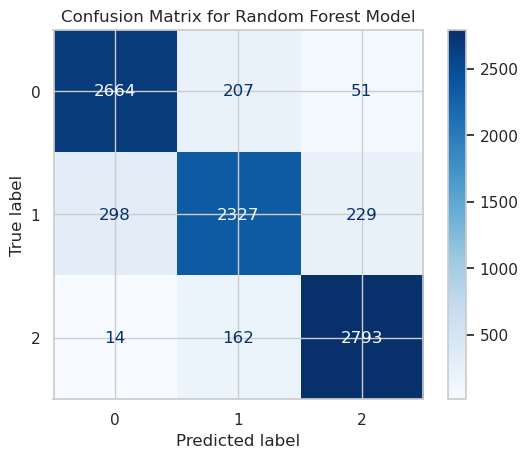

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_split, np.round(y_pred), labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [118]:
# get the TF and FN values
print("\nTrue Positives (TP):", np.sum((y_test_split == 1) & (np.round(y_pred) == 1)))
print("True Negatives (TN):", np.sum((y_test_split == 0) & (np.round(y_pred) == 0)))
print("False Positives (FP):", np.sum((y_test_split == 0) & (np.round(y_pred) == 1)))
print("False Negatives (FN):", np.sum((y_test_split == 1) & (np.round(y_pred) == 0)))


True Positives (TP): 2327
True Negatives (TN): 2664
False Positives (FP): 207
False Negatives (FN): 298


In [122]:
# percesion and recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test_split, np.round(y_pred), average='weighted')
recall = recall_score(y_test_split, np.round(y_pred), average='weighted')

print(f"Precision (TP Rate): {precision:.2f}")
print(f"Recall (TN Rate): {recall:.2f}")
print("False Negative Rate (FN Rate): {:.2f}".format(1 - recall))

Precision (TP Rate): 0.89
Recall (TN Rate): 0.89
False Negative Rate (FN Rate): 0.11


<a id="key-insights"></a>
## 5.1 💡 Key Insights

Model Insights🗝️
______________________________________________________________________

Our Final Model is RandomForestClassifier + SMOTE achieves a high accuracy on test set of approximately 90% 🥇     
The (TP Rate) of our model is 89% which means that the model predict 89 True instances correctly from a total of 100 actual positive instances 🤌  
The (TN Rate) of our model is 89% which means that the model predict 89 negative instances correctly from a total of 100 actual negative instances 🥈
The (FP Rate) of our model is 11% which means that the model incorrectly predict 11 negative instances as positive from a total of 100 actual negative instances 💪

______________________________________________________________________

<a id="SHAP"></a>
## 5.2 📊 Model Explainability using SHAP

I won't run this cell cuz it takes more than 30mins on my 4060ti GPU

In [ ]:
# use SHAP for Global model explainability
import shap 
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test_split)
shap.summary_plot(shap_values, X_test_split, plot_type="bar", max_display=10)


In [ ]:
# SHAP insights🗝️

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test_split)